In [35]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np
from q_solve import generate_result


In [4]:
w=[2,4,6,8,10,12,14,16,18,20]
for i, wi in enumerate(w):
    print(i)
    print(wi)

0
2
1
4
2
6
3
8
4
10
5
12
6
14
7
16
8
18
9
20


In the next few cells, we see that the density parameter of rand_herm is for the sparsness/

In [18]:
import numpy as np
H_system_2 = qt.rand_herm(1000,0.75)  # Random Hermitian matrix for system 2
H_system_1 = qt.rand_herm(100,1)  # Random Hermitian matrix for system 2
largest_norm = np.max(np.abs(H_system_2.full()))
print(largest_norm)
#note, largest term in matrix is dependant on matrix size. 

1.400118355328361


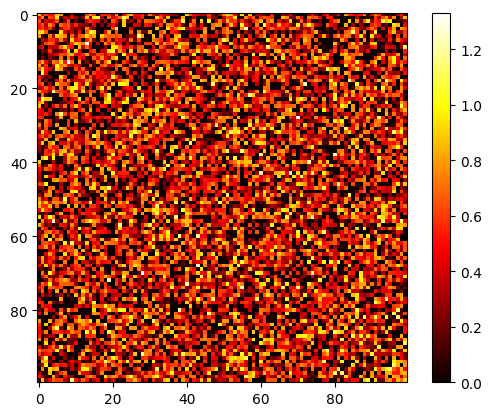

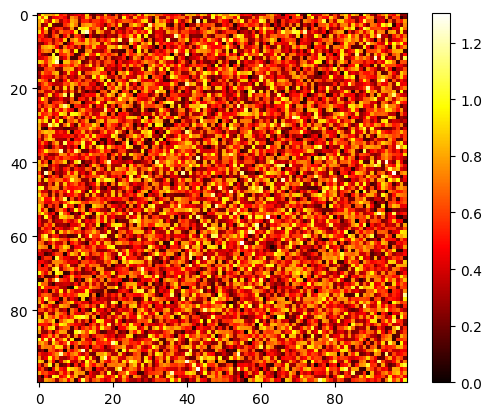

In [21]:

import matplotlib.pyplot as plt
a=H_system_2.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

a=H_system_1.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


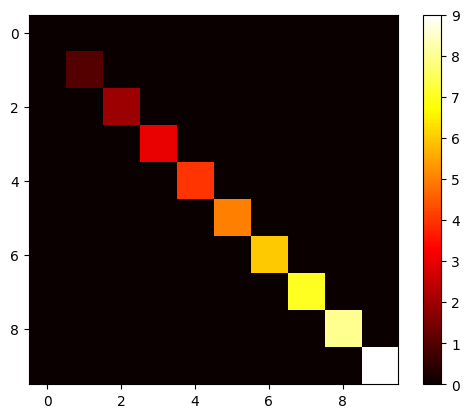

In [41]:
dim_system_1=10
energy_spacing = 1
diagonal_elements = np.arange(0, dim_system_1) * energy_spacing
H_q = qt.Qobj(np.diag(diagonal_elements)) # Create a diagonal matrix with increasing diagonal elements
H_q=abs(H_q.full())
plt.imshow(H_q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [30]:
def _rand_herm_sparse(N, density, pos_def):
    target = (1-(1-density)**0.5)
    num_elems = (N**2 - 0.666 * N) * target + 0.666 * N * density
    num_elems = max([num_elems, 1])
    num_elems = int(num_elems)
    data = (2 * np.random.rand(num_elems) - 1) + \
           (2 * np.random.rand(num_elems) - 1) * 1j
    row_idx, col_idx = zip(*[
        divmod(index, N)
        for index in np.random.choice(N*N, num_elems, replace=False)
    ])
    M = sp.coo_matrix((data, (row_idx, col_idx)),
                      dtype=complex, shape=(N, N))
    M = 0.5 * (M + M.conj().transpose())
    if pos_def:
        M = M.tocoo()
        M.setdiag(np.abs(M.diagonal()) + np.sqrt(2)*N)
    M = M.tocsr()
    M.sort_indices()
    return M

In [16]:
import scipy.sparse as sp
N=10
M = _rand_herm_sparse(N, 0.5, False)



Trying to figure out the wigner semi-circles of the random matrices.

I want to see the wigner semi-circle of H_rand_d1, id.otime.H_rand_d1 and H_rand_d1*d2.


In [91]:
def plot_e_spectrum_all(H_total,H_system_2,H_system_1_ext,H_system_2_ext,H_interaction, result,EI):
    eigenenergies_total, eigenstates_total = H_total.eigenstates() 
    eigenenergies_syst_2, eigenstates_total_syst_2 = H_system_2_ext.eigenstates()
    eigenenergies_int, eigenstates_int = H_interaction.eigenstates()

    min_energy=min(eigenenergies_total)
    max_energy=max(eigenenergies_total)
    min_energy_syst_2=min(eigenenergies_syst_2)
    max_energy_syst_2=max(eigenenergies_syst_2)
    min_energy_int=min(eigenenergies_int)  
    max_energy_int=max(eigenenergies_int)
    
    state = result.states[0]
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    c = np.count_nonzero(energy_coeff)
    num_bins=100
    
    plt.figure(figsize=(10, 2))
    plt.plot(eigenenergies_total,energy_coeff);
    plt.title(f"Plot of the probability that the global state be in an energy eigenstate for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.show()
    
    #looks like a nice wigner semicircle, this is the thing, who's shape changes as the interaction energy increases. lets check that
    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_total, bins=num_bins, range=(min_energy, max_energy), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_total for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_syst_2, bins=num_bins, range=(min_energy_syst_2, max_energy_syst_2), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_system_2_ext in eig_syste2 for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_int, bins=num_bins, range=(min_energy_int, max_energy_int), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_int in eig_int for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()


In [85]:
def shatten_p(A,p):
    eig_val,eig_vect = np.linalg.eig(A)
    shatten_p = np.sum(np.abs(eig_val)**p)**(1/p)
    return shatten_p

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_11553/2719016647.py:4: RuntimeWarning: invalid value encountered in sqrt
  return 2/(np.pi*(10*k)**2)*(np.sqrt(k**2-x**2))


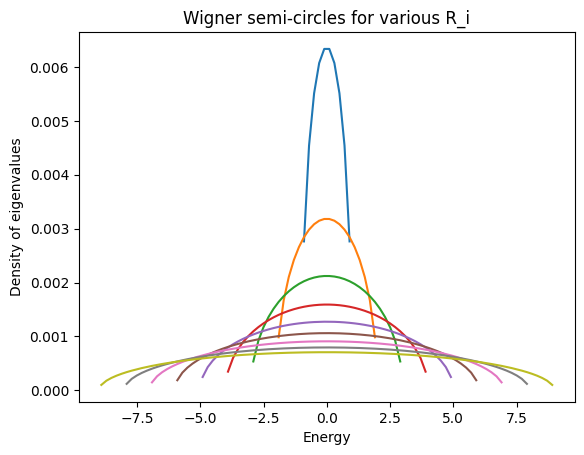

In [111]:
# Define the function generator
def generate_function(k):
    def f(x):
        return 2/(np.pi*(10*k)**2)*(np.sqrt(k**2-x**2))
    return f

# Define the range of x values
x = np.linspace(-100, 100, 1000)

# Calculate the sum of the functions
k_values = [1,2,3,4,5,6,7,8,9]  # Set the values of k
y_sum = np.zeros_like(x)  # Initialize the sum

for k in k_values:
    f = generate_function(k)
    y = f(x)
    plt.plot(x, y)
    y_sum += y
plt.title('Wigner semi-circles for various R_i')
plt.xlabel('Energy')
plt.ylabel('Density of eigenvalues')

plt.show()



In [92]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)

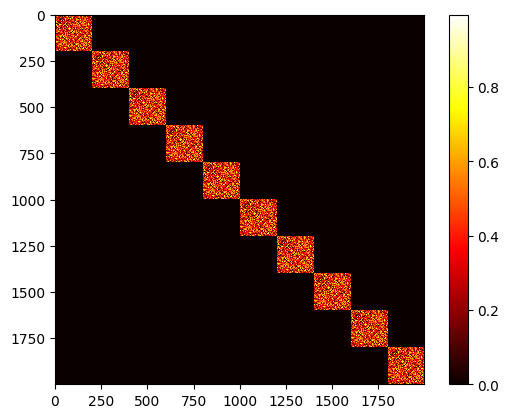

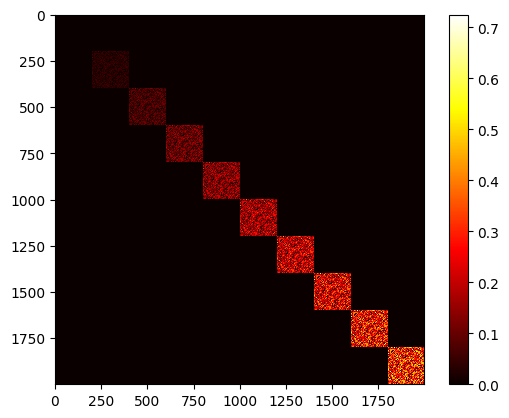

1011.5130188851325
8.213236080960128


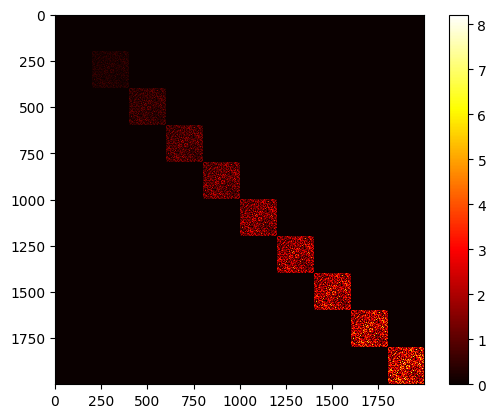

In [87]:
H_system_2_ext=H_system_2_ext.full()    
H_interaction=H_interaction.full()  
plt.imshow(abs(H_system_2_ext), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(abs(H_interaction), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
A = np.dot(H_system_2_ext,H_interaction)-np.dot(H_interaction,H_system_2_ext)
shatten = shatten_p(A,2)
print(shatten)
max_value = np.max(np.abs(A))
print(max_value)
plt.imshow(abs(A), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

From what we have here, we conclude that the 2 matries definitely do not commute, and so do not share an eigenbasis. That is to say, eigenbasis of A and B are different from the eigenbasis of A+B. There might be something weird that allows me to still see their spectrums as summed though...

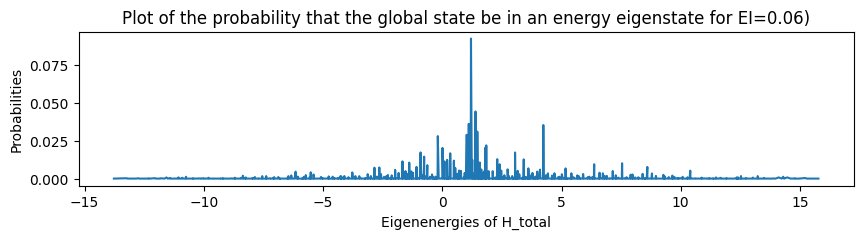

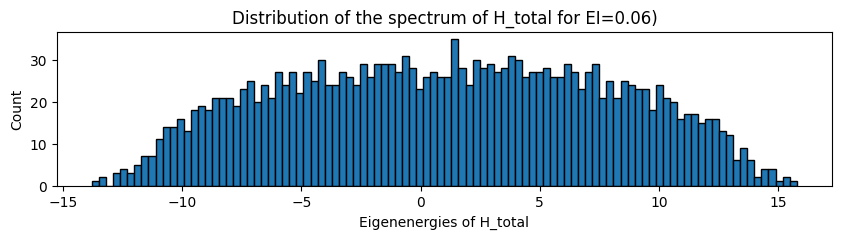

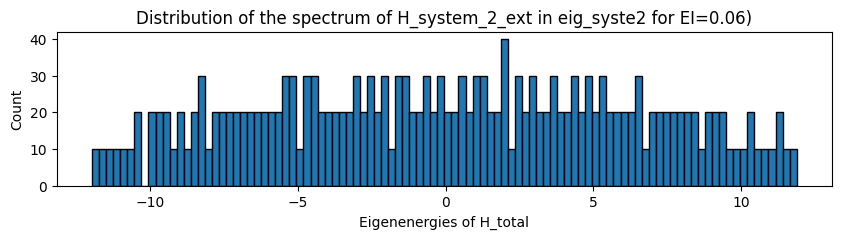

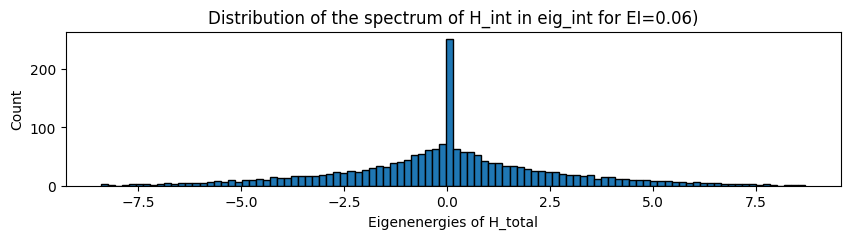

In [93]:
plot_e_spectrum_all(H_total,H_system_2,H_system_1_ext,H_system_2_ext,H_interaction, result,Int_strength)